# Data Processing For Neural Network Training

In [36]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [37]:
train_labels = []
train_samples = []

In [38]:
for i in range(50):
    # The 5% of younger people experienced side effects and labeled as "1"
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The 5% of older people did not experience side effects and labeled as "0"
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # The 95% of younger people did not experience side effects and labeled as "0"
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The 95% of older people experienced side effects and labeled as "1"
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)



In [39]:
print(f"Train Samples: {train_samples}")
print(f"The length of train samples : {len(train_samples)}")
print(f"Train labels: {train_labels}")
print(f"The length of train labels : {len(train_labels)}")

Train Samples: [30, 94, 31, 66, 63, 80, 57, 96, 18, 98, 45, 66, 62, 99, 58, 72, 56, 80, 40, 65, 47, 94, 36, 81, 60, 69, 42, 88, 24, 84, 47, 98, 31, 76, 53, 99, 43, 82, 44, 67, 36, 73, 49, 69, 57, 97, 15, 87, 32, 91, 32, 79, 32, 68, 28, 91, 43, 90, 26, 87, 57, 91, 39, 66, 58, 86, 32, 99, 20, 85, 20, 76, 46, 95, 45, 66, 53, 67, 13, 97, 32, 80, 19, 66, 41, 90, 47, 100, 59, 65, 32, 79, 16, 72, 17, 91, 64, 71, 26, 81, 46, 96, 45, 82, 64, 76, 21, 91, 40, 88, 47, 77, 26, 68, 32, 97, 34, 96, 64, 86, 35, 76, 15, 69, 13, 96, 16, 67, 51, 96, 44, 100, 33, 65, 52, 70, 48, 68, 59, 95, 61, 86, 22, 94, 16, 77, 56, 74, 64, 71, 14, 79, 39, 69, 30, 84, 63, 75, 24, 69, 25, 75, 47, 87, 22, 65, 57, 76, 49, 70, 61, 94, 37, 95, 55, 74, 48, 77, 29, 71, 22, 94, 30, 76, 16, 96, 40, 65, 35, 85, 41, 90, 57, 91, 49, 96, 55, 91, 13, 88, 39, 97, 43, 70, 47, 93, 21, 90, 54, 90, 32, 94, 45, 84, 25, 97, 20, 97, 21, 100, 62, 69, 29, 88, 25, 89, 38, 73, 14, 71, 22, 95, 49, 84, 37, 88, 63, 93, 24, 93, 57, 69, 48, 74, 31, 9

In [40]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) # Here reshape because the fit_transform function can not take the 1D array


# Simple tf.keras Sequential Model

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [43]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPUs Available:", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available: 1


In [44]:
model = Sequential([
    Dense(units=16,input_shape=(1,),  activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
    
])

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=50, shuffle=True, verbose=2)

Epoch 1/50
189/189 - 0s - loss: 0.6799 - accuracy: 0.5159 - val_loss: 0.6717 - val_accuracy: 0.5190
Epoch 2/50
189/189 - 0s - loss: 0.6622 - accuracy: 0.5683 - val_loss: 0.6538 - val_accuracy: 0.5857
Epoch 3/50
189/189 - 0s - loss: 0.6396 - accuracy: 0.6714 - val_loss: 0.6238 - val_accuracy: 0.7286
Epoch 4/50
189/189 - 0s - loss: 0.6080 - accuracy: 0.7619 - val_loss: 0.5918 - val_accuracy: 0.7667
Epoch 5/50
189/189 - 0s - loss: 0.5773 - accuracy: 0.7852 - val_loss: 0.5578 - val_accuracy: 0.8238
Epoch 6/50
189/189 - 0s - loss: 0.5448 - accuracy: 0.8143 - val_loss: 0.5223 - val_accuracy: 0.8429
Epoch 7/50
189/189 - 0s - loss: 0.5112 - accuracy: 0.8360 - val_loss: 0.4854 - val_accuracy: 0.8667
Epoch 8/50
189/189 - 0s - loss: 0.4778 - accuracy: 0.8550 - val_loss: 0.4495 - val_accuracy: 0.8905
Epoch 9/50
189/189 - 0s - loss: 0.4463 - accuracy: 0.8741 - val_loss: 0.4154 - val_accuracy: 0.9000
Epoch 10/50
189/189 - 0s - loss: 0.4177 - accuracy: 0.8889 - val_loss: 0.3855 - val_accuracy: 0.9095

# Creating The Test Set

In [48]:
test_labels = []
test_samples = []

In [49]:
for i in range(10):
    # The 5% of younger people experienced side effects and labeled as "1"
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older people did not experience side effects and labeled as "0"
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # The 95% of younger people did not experience side effects and labeled as "0"
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older people experienced side effects and labeled as "1"
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)



In [50]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [51]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict

In [52]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)  

In [65]:
for i in predictions:
    print(i)
# print(predictions)

[0.02103082 0.9789692 ]
[0.04403739 0.9559626 ]
[0.07115213 0.92884785]
[0.90325695 0.09674302]
[0.03177712 0.9682229 ]
[0.9790142  0.02098574]
[0.5925231 0.4074769]
[0.96481997 0.03517999]
[0.9768499 0.0231501]
[0.9685565  0.03144352]
[0.9715077  0.02849227]
[0.24689761 0.7531024 ]
[0.9592546  0.04074538]
[0.04403739 0.9559626 ]
[0.9749366  0.02506337]
[0.977958   0.02204198]
[0.01638629 0.9836137 ]
[0.9177231  0.08227684]
[0.9790142  0.02098574]
[0.3643311  0.63566893]
[0.86568403 0.13431595]
[0.97584015 0.02415983]
[0.11298867 0.88701135]
[0.9765645  0.02343553]
[0.03449101 0.96550906]
[0.78674686 0.21325317]
[0.9771319  0.02286807]
[0.06073128 0.9392687 ]
[0.9790142  0.02098574]
[0.05607259 0.94392735]
[0.97098213 0.0290179 ]
[0.9774106 0.0225894]
[0.07115213 0.92884785]
[0.3223881 0.6776119]
[0.0248195 0.9751805]
[0.0150747 0.9849253]
[0.08990072 0.91009927]
[0.08320273 0.9167973 ]
[0.50049937 0.49950057]
[0.9776859  0.02231405]
[0.21392426 0.7860757 ]
[0.05607259 0.94392735]
[0.0

In [66]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [67]:
for i in rounded_predictions:
    print(i)
# print(rounded_predictions)

1
1
1
0
1
0
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
1
0
1
0
0
1
0
1
0
0
1
1
1
1
1
1
0
0
1
1
1
0
1
0
1
1
0
0
1
1
0
0
0
0
0
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
0
0
1
0
0
1
1
1
0
0
0
0
0
1
1
0
0
1
0
1
0
1
0
1
0
1
1
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
0
0
0
0
0
0
0
0
1
0
1
1
1
0
1
0
0
0
0
0
0
1
1
1
1
0
0
1
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
0
1
0
1
1
0
1
1
0
0
1
0
1
0
0
1
0
0
1
1
0
0
0
0
0
1
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
1
1
1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
1
1
1
0
0
0
0
0
1
1
0
1
0
0
1
1
1
1
1
1
1
0
0
1
0
0
1
0
1
0
1
1
0
1
1
1
1
0
1
1
1
0
0
0
1
0
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
0
0
1
1
0
0
0
1
0
1
0
1
1
0
0
0
1
1
1
0
1
0
1
0
0
0
0
1
1
1
1
0
0
1
0
0
1
0
1
1
1
1
1
1
1
1
0
0
1
1
0
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
0
0
0
0
1
1
0
1
1
0
1


# Confusion Matrix

In [69]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [70]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [71]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[198  12]
 [  9 201]]


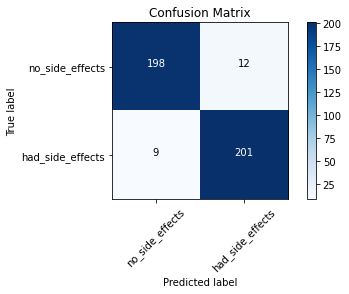

In [72]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')